In [198]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import datetime as dt
import timeit

In [55]:
dfData = pd.read_csv("dfData.csv")
dfData.set_index('time_period', inplace = True)
dfData.fillna(value = dfData.mean(), inplace=True)
print(len(dfData))
dfData.head(20)

588


,volume_traded,Bullish,Positive,Negative,Hopeful,Euphoric/Excited,Long_term_investing,price_open,trades_count,Selling,...,Optimistic,price_high,rsi,bolinger_high,bolinger_low,bolinger_middle,macd,vortex,stoch,movement
time_period,,,,,,,,,,,,,,,,,,,,,
12/28/2020,25763.51754,89,166,122,12,27,79,684.42,15333,35,...,44,746.98,52.328735,2748.975368,2506.840499,2627.907933,5.714479,0.974179,56.135943,-2.906701e+06
12/29/2020,16248.29869,56,144,133,10,13,53,729.02,11362,26,...,35,739.09,52.328735,2748.975368,2506.840499,2627.907933,5.714479,0.974179,56.135943,-2.445256e+05
12/30/2020,14385.47579,66,101,53,7,19,36,731.79,9679,16,...,26,758.60,52.328735,2748.975368,2506.840499,2627.907933,5.714479,0.974179,56.135943,1.050903e+07
12/31/2020,18938.33743,48,112,89,12,20,39,752.50,9639,11,...,35,756.04,52.328735,2748.975368,2506.840499,2627.907933,5.714479,0.974179,56.135943,1.680988e+06
01/01/2021,15129.68596,24,83,74,3,16,28,736.90,7544,12,...,28,750.39,52.328735,2748.975368,2506.840499,2627.907933,5.714479,0.974179,56.135943,-3.011855e+06
01/02/2021,26362.64832,75,129,106,10,24,45,731.19,13326,19,...,34,788.89,52.328735,2748.975368,2506.840499,2627.907933,5.714479,0.974179,56.135943,1.092775e+07
01/03/2021,86710.73835,169,325,191,27,88,104,775.24,38600,58,...,42,1021.85,94.762168,860.170556,692.180873,776.175714,5.714479,0.974179,87.299865,9.340068e+07
01/04/2021,88682.01485,120,261,212,9,59,100,980.02,50719,42,...,55,1168.00,95.899571,942.758774,699.075511,820.917143,5.714479,0.456131,73.811308,7.302116e+07
01/05/2021,48366.89405,105,205,177,11,46,58,1043.99,32159,19,...,58,1135.42,96.695249,1023.060747,724.999253,874.030000,5.714479,0.551201,85.744848,1.357327e+07


In [56]:
dfData["next_price_close"] = dfData['price_close'].shift(-1)
dfData.drop(dfData.tail(1).index,inplace=True)
print(len(dfData))
dfData[["price_close", "next_price_close"]]

587


,price_close,next_price_close
time_period,,
12/28/2020,729.01,730.91
12/29/2020,730.91,751.98
12/30/2020,751.98,737.27
12/31/2020,737.27,730.79
01/01/2021,730.79,774.73
...,...,...
08/02/2022,1631.03,1618.62
08/03/2022,1618.62,1608.23
08/04/2022,1608.23,1736.57


In [57]:
columns = list(dfData.columns)
target = 'next_price_close'
columns.remove(target)

x_columns = columns
y_column = [target]

print(x_columns)
print(y_column)

['volume_traded', 'Bullish', 'Positive', 'Negative', 'Hopeful', 'Euphoric/Excited', 'Long_term_investing', 'price_open', 'trades_count', 'Selling', 'price_low', 'Buying', 'price_close', 'Optimistic', 'price_high', 'rsi', 'bolinger_high', 'bolinger_low', 'bolinger_middle', 'macd', 'vortex', 'stoch', 'movement']
['next_price_close']


In [58]:
prediction_days = 28 
df_train = dfData[:len(dfData)-prediction_days]
df_test = dfData[len(dfData)-prediction_days:]  

In [59]:
print(len(df_train))
print(len(df_test))

559
28


In [60]:
x_train = df_train[x_columns]
y_train = df_train[y_column]

x_test = df_test[x_columns]
y_test = df_test[y_column]

In [61]:
print(len(x_test))
print(len(y_test))

28
28


In [191]:
n_estimators = 1000
random_state = 1400
learning_rate = 0.05

In [192]:
model = GradientBoostingRegressor(n_estimators=n_estimators,
                                 random_state = random_state,
                                 learning_rate = learning_rate)
                                 

In [201]:
start = timeit.default_timer()
model.fit(x_train, np.ravel(y_train))
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  5.557609299954493


In [194]:
predictions = model.predict(x_test)
len(predictions)

28

In [172]:
startDate = dt.datetime(2022, 7, 11)
endDate = startDate + dt.timedelta(days=28)
days = mdates.drange(startDate,endDate,dt.timedelta(days=1))

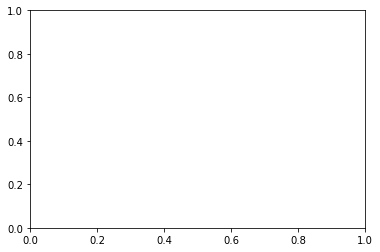

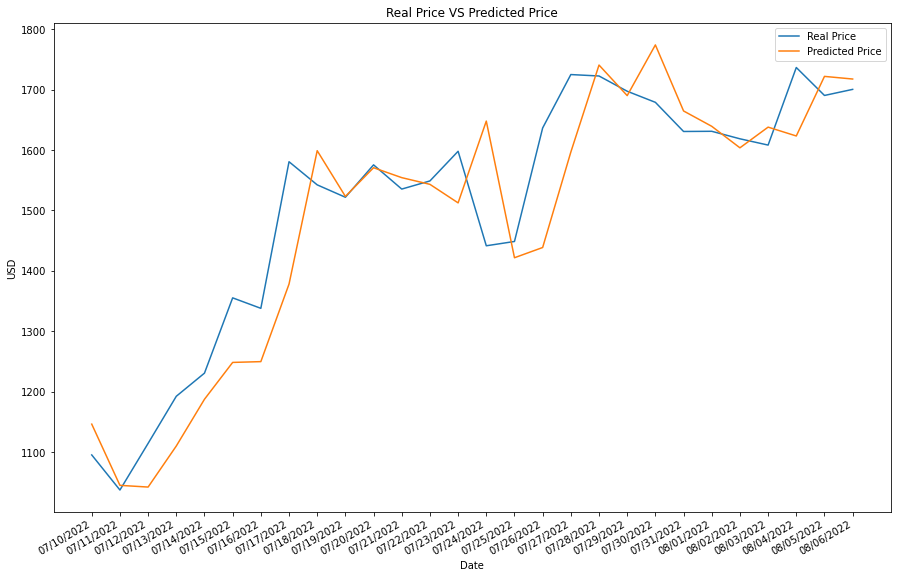

In [197]:
fig = plt.figure()
ax = plt.axes()
plt.subplots(figsize=(15,10))
plt.title("Real Price VS Predicted Price")
plt.xlabel("Date")
plt.ylabel("USD");
plt.plot(y_test, label="Real Price")
plt.plot(predictions, label="Predicted Price")
plt.gcf().autofmt_xdate()
plt.legend()
plt.savefig('GBRfinalPrediction.jpg')

In [196]:
print("Model Accuracy: %.3f" % model.score(x_test, y_test))
mae = metrics.mean_absolute_error(y_test, model.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

Model Accuracy: 0.816
The mean absolute error (MAE) on test set: 62.6732


In [147]:
def learning_rate_estimators_tunning(learning_rates, estimators):
    for learning_rate in learning_rates:
        for estimator in estimators:
            model = GradientBoostingRegressor(n_estimators=estimator,
                                 random_state = 1400,
                                 learning_rate = learning_rate)
            model.fit(x_train, np.ravel(y_train))
            accuracy = model.score(x_test, y_test)
            print("Model Accuracy for {} learning rate and {} estimators is: {:.3f}".format(learning_rate, estimator, accuracy))
            mae = metrics.mean_absolute_error(y_test, model.predict(x_test))
            print("The mean absolute error (MAE) for {} learning rate and {} estimators is: {:.4f}".format(learning_rate, estimator, mae))
    

In [148]:
LearningRates = [0.1, 0.07, 0.05, 0.03]
Estimators = [300, 500, 700, 1000]
learning_rate_estimators_tunning(LearningRates, Estimators)

Model Accuracy for 0.1 learning rate and 300 estimators is: 0.793
The mean absolute error (MAE) for 0.1 learning rate and 300 estimators is: 69.7836
Model Accuracy for 0.1 learning rate and 500 estimators is: 0.790
The mean absolute error (MAE) for 0.1 learning rate and 500 estimators is: 70.3836
Model Accuracy for 0.1 learning rate and 700 estimators is: 0.785
The mean absolute error (MAE) for 0.1 learning rate and 700 estimators is: 70.8876
Model Accuracy for 0.1 learning rate and 1000 estimators is: 0.784
The mean absolute error (MAE) for 0.1 learning rate and 1000 estimators is: 70.6453
Model Accuracy for 0.07 learning rate and 300 estimators is: 0.798
The mean absolute error (MAE) for 0.07 learning rate and 300 estimators is: 68.8968
Model Accuracy for 0.07 learning rate and 500 estimators is: 0.805
The mean absolute error (MAE) for 0.07 learning rate and 500 estimators is: 65.9681
Model Accuracy for 0.07 learning rate and 700 estimators is: 0.801
The mean absolute error (MAE) for

In [188]:
for maxDepth in range(1, 10, 2):
    model = GradientBoostingRegressor(n_estimators=1000,
                                 random_state = 1400,
                                 learning_rate = 0.05,
                                 max_depth=maxDepth )
    model.fit(x_train, np.ravel(y_train))
    accuracy = model.score(x_test, y_test)
    mae = metrics.mean_absolute_error(y_test, model.predict(x_test))
    print("For a depth of size {}, accuracy is {:.3f} and mae is: {:.4f}".format(maxDepth,accuracy, mae))

For a depth of size 1, accuracy is 0.784 and mae is: 73.2350
For a depth of size 3, accuracy is 0.816 and mae is: 62.6732
For a depth of size 5, accuracy is 0.675 and mae is: 82.0411
For a depth of size 7, accuracy is 0.559 and mae is: 105.3699
For a depth of size 9, accuracy is 0.487 and mae is: 111.1284


In [190]:
    for minSplit in range(2,5):
        for minLeaf in range (1,5):
            model = GradientBoostingRegressor(n_estimators=1000,
                                              random_state = 1400,
                                              learning_rate = 0.05,
                                              min_samples_split=minSplit, 
                                              min_samples_leaf=minLeaf)
            model.fit(x_train, np.ravel(y_train))
            accuracy = model.score(x_test, y_test)
            mae = metrics.mean_absolute_error(y_test, model.predict(x_test))
            print("For a min split of size {} and min leaf of size {}, accuracy is {:.3f} and mae is: {:.4f}".format(minSplit, minLeaf, accuracy, mae))

For a min split of size 2 and min leaf of size 1, accuracy is 0.816 and mae is: 62.6732
For a min split of size 2 and min leaf of size 2, accuracy is 0.801 and mae is: 67.4993
For a min split of size 2 and min leaf of size 3, accuracy is 0.801 and mae is: 64.8576
For a min split of size 2 and min leaf of size 4, accuracy is 0.802 and mae is: 67.4073
For a min split of size 3 and min leaf of size 1, accuracy is 0.801 and mae is: 66.7934
For a min split of size 3 and min leaf of size 2, accuracy is 0.801 and mae is: 67.4993
For a min split of size 3 and min leaf of size 3, accuracy is 0.801 and mae is: 64.8576
For a min split of size 3 and min leaf of size 4, accuracy is 0.802 and mae is: 67.4073
For a min split of size 4 and min leaf of size 1, accuracy is 0.777 and mae is: 70.6186
For a min split of size 4 and min leaf of size 2, accuracy is 0.801 and mae is: 67.4993
For a min split of size 4 and min leaf of size 3, accuracy is 0.801 and mae is: 64.8576
For a min split of size 4 and mi

In [202]:
predictions

array([1146.51202779, 1045.2202378 , 1042.39338974, 1110.31519168,
       1187.67683071, 1248.61913944, 1249.92473902, 1378.20122727,
       1598.94495569, 1523.31323029, 1570.76073766, 1554.3481477 ,
       1543.26813139, 1512.58719574, 1647.92272569, 1421.82708751,
       1438.75139351, 1596.69601011, 1740.64941409, 1690.07173211,
       1773.94964388, 1664.68187294, 1639.27268087, 1603.70184506,
       1637.9204757 , 1623.29534144, 1721.87130261, 1717.52181195])

In [204]:
dfPred = pd.DataFrame(predictions)

In [206]:
dfPred.to_csv("GBRpredictions.csv")

In [207]:
metrics.max_error(y_test, predictions)

206.31272569161138

In [208]:
metrics.mean_absolute_error(y_test, predictions)

62.6731619501949

In [209]:
metrics.r2_score(y_test, predictions)

0.8160101948962725

In [210]:
metrics.median_absolute_error(y_test, predictions)

38.58252111567401